### Implementation of task C 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools.task import wrap_angle

In [2]:
ekf_input = np.load('exp_data/ekf_out/input_data.npy')
ekf_output = np.load('exp_data/ekf_out/output_data.npy')

pf_input = np.load('exp_data/pf_out/input_data.npy')
pf_output = np.load('exp_data/pf_out/output_data.npy')

In [3]:
real_path_ekf = ekf_input['real_robot_path']
real_path_pf = pf_input['real_robot_path']

mean_path_ekf= ekf_output['mean_trajectory']
mean_path_pf = pf_output['mean_trajectory']

cov_path_ekf = ekf_output['covariance_trajectory']
cov_path_pf = pf_output['covariance_trajectory']

n_ekf_steps = ekf_input['num_steps']
n_pf_steps = pf_input['num_steps']


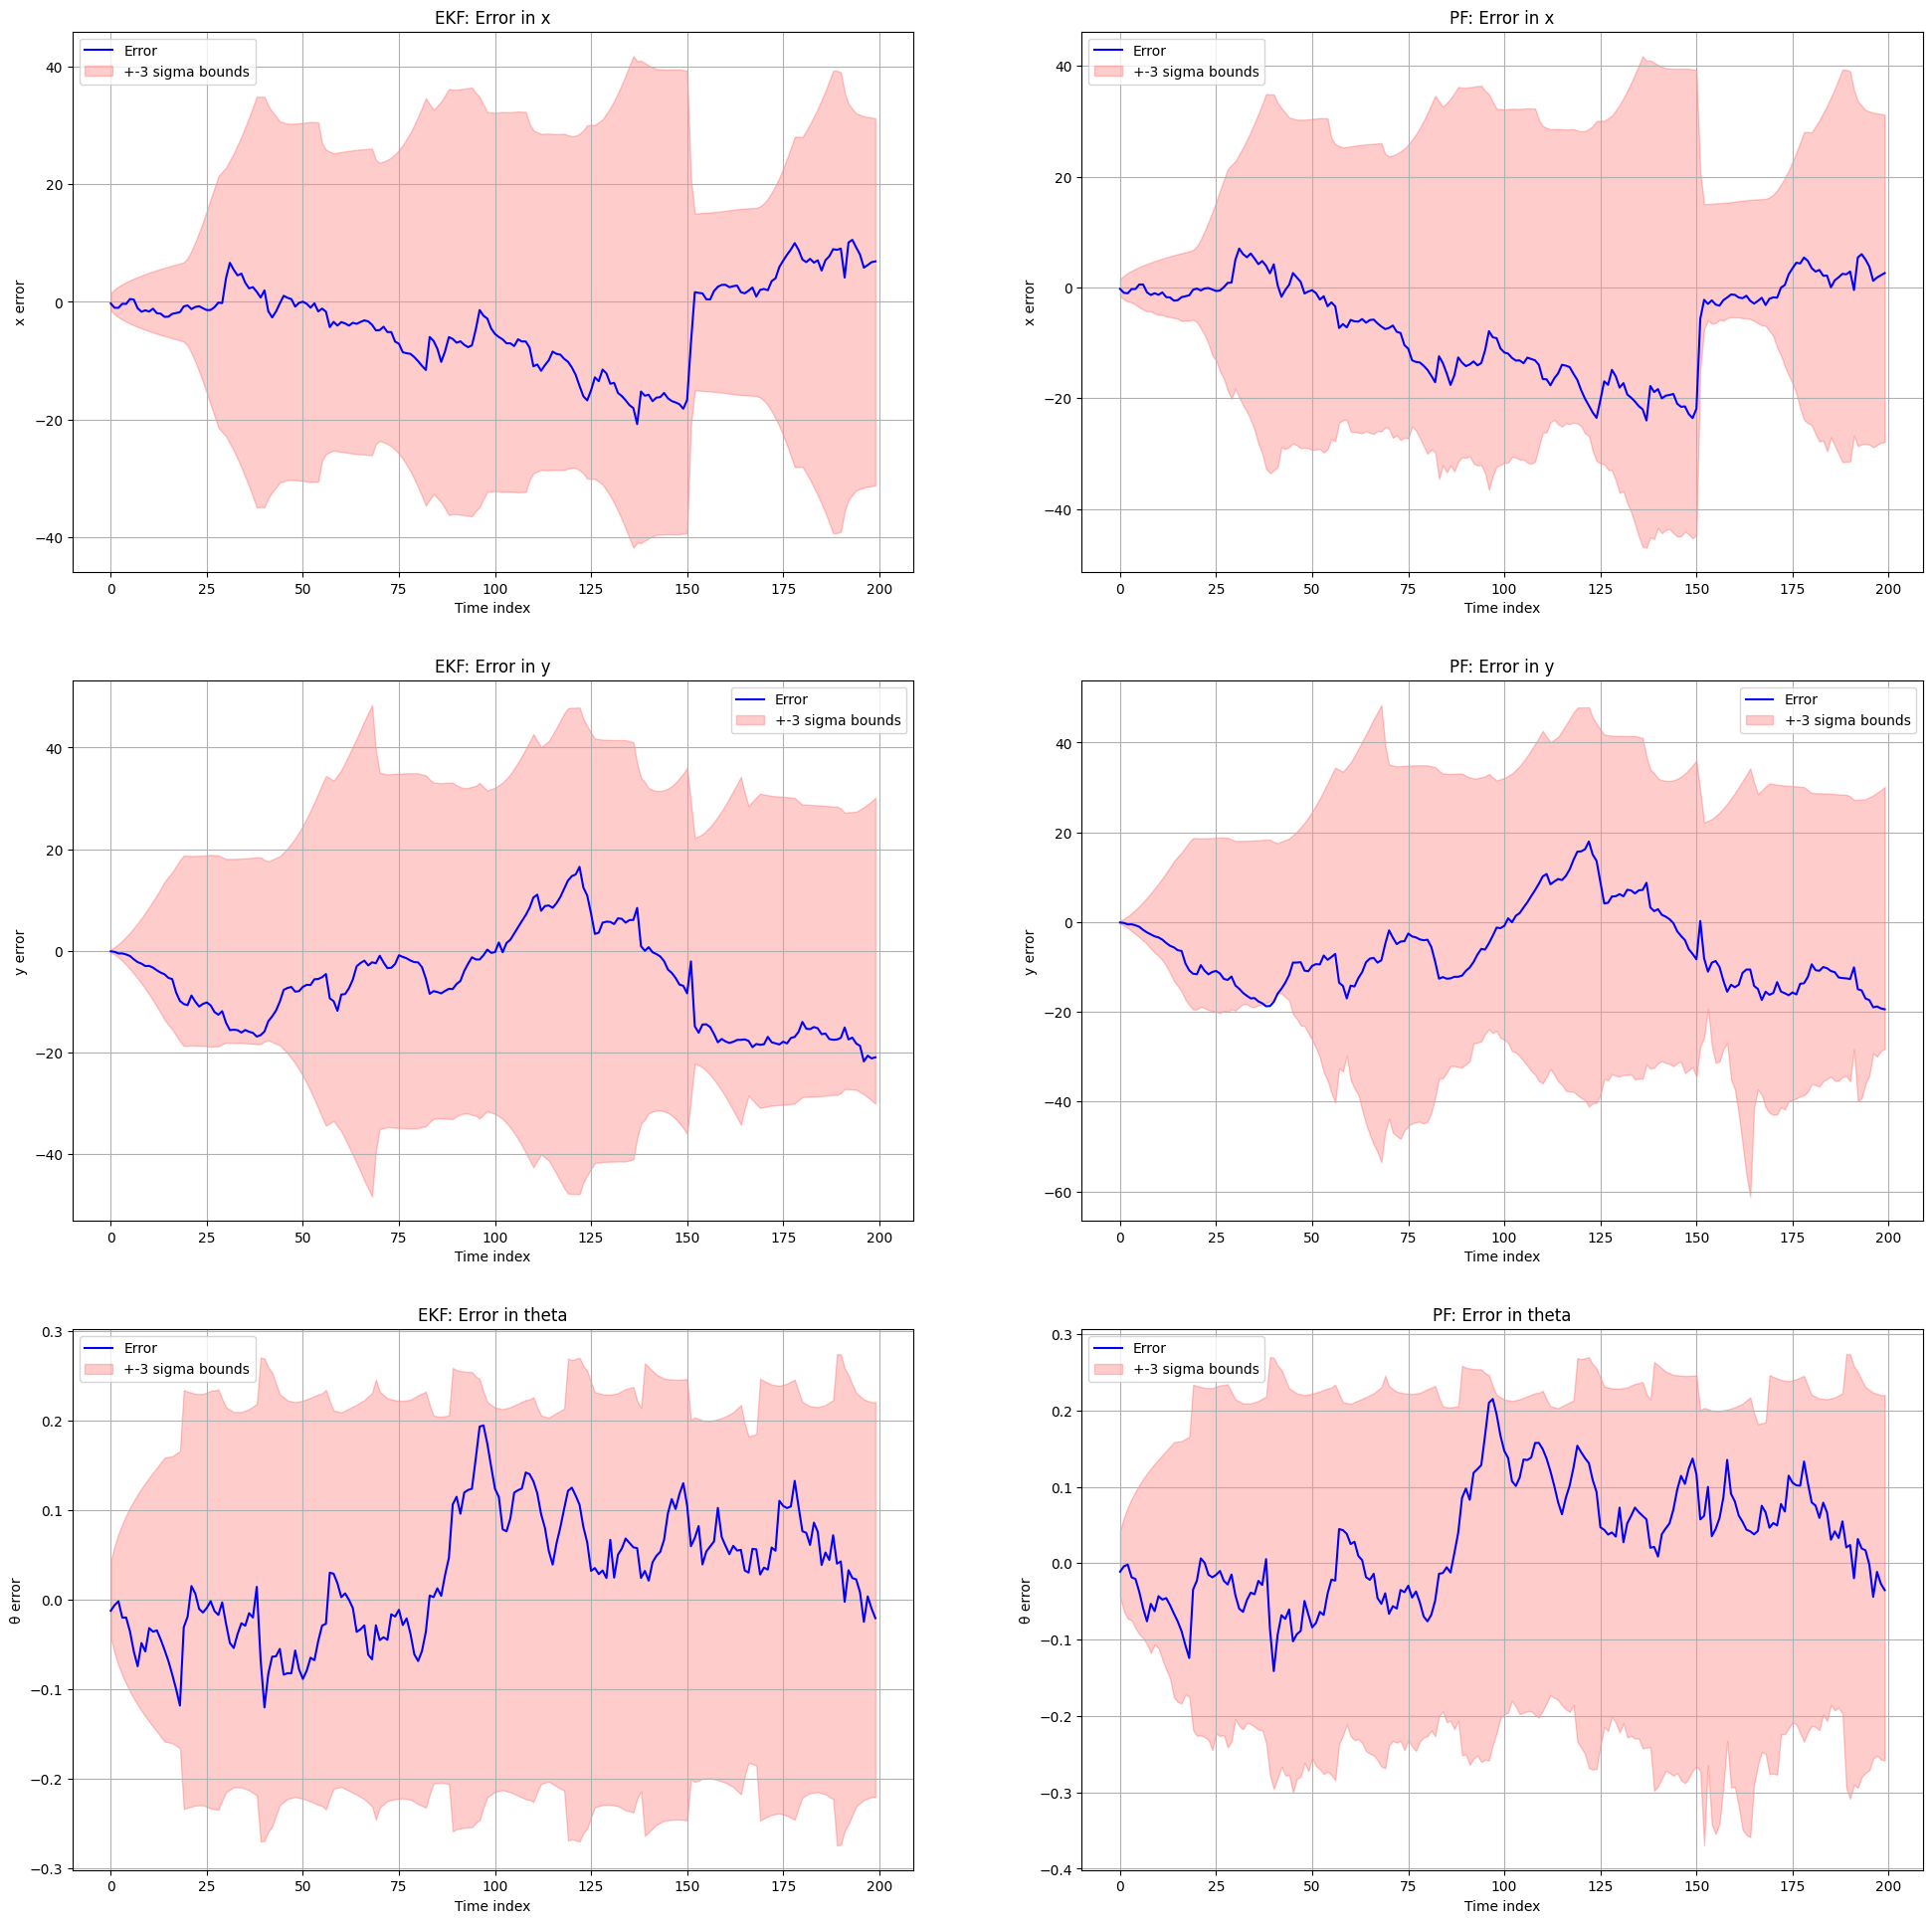

In [4]:
error_ekf = real_path_ekf - mean_path_ekf
error_pf = real_path_pf - mean_path_pf

for i in range(len(error_ekf)):
    error_ekf[i, 2] = wrap_angle(error_ekf[i, 2])

for i in range(len(error_pf)):
    error_pf[i, 2] = wrap_angle(error_pf[i, 2])

sigma_ekf = np.sqrt(np.diagonal(cov_path_ekf, axis1=0, axis2=1))
sigma_pf = np.sqrt(np.diagonal(cov_path_pf, axis1=0, axis2=1))

time_ekf = np.arange(n_ekf_steps)
time_pf = np.arange(n_pf_steps)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF: {titles[i]}')
    axs[i, 0].plot(time_ekf, error_ekf[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_ekf, -3 * sigma_ekf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'PF: {titles[i]}')
    axs[i, 1].plot(time_pf, error_pf[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf, -3 * sigma_pf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

In [5]:
percentage_within_bounds_ekf = np.mean(np.abs(error_ekf) < 3 * sigma_ekf)
percentage_within_bounds_pf = np.mean(np.abs(error_pf) < 3 * sigma_pf)

print("Percentage of EKF trajectory within +- 3 sigma bounds:", percentage_within_bounds_ekf * 100)
print("Percentage of PF trajectory within +- 3 sigma bounds:", percentage_within_bounds_pf * 100)

Percentage of EKF trajectory within +- 3 sigma bounds: 100.0
Percentage of PF trajectory within +- 3 sigma bounds: 99.5


### Task D







### Subtask 1: Lets make the transition noise in action space smaller (Alphas are zero) and see how it affects the EKF. Also lets make the noise of the motion model smaller (Q is zero).

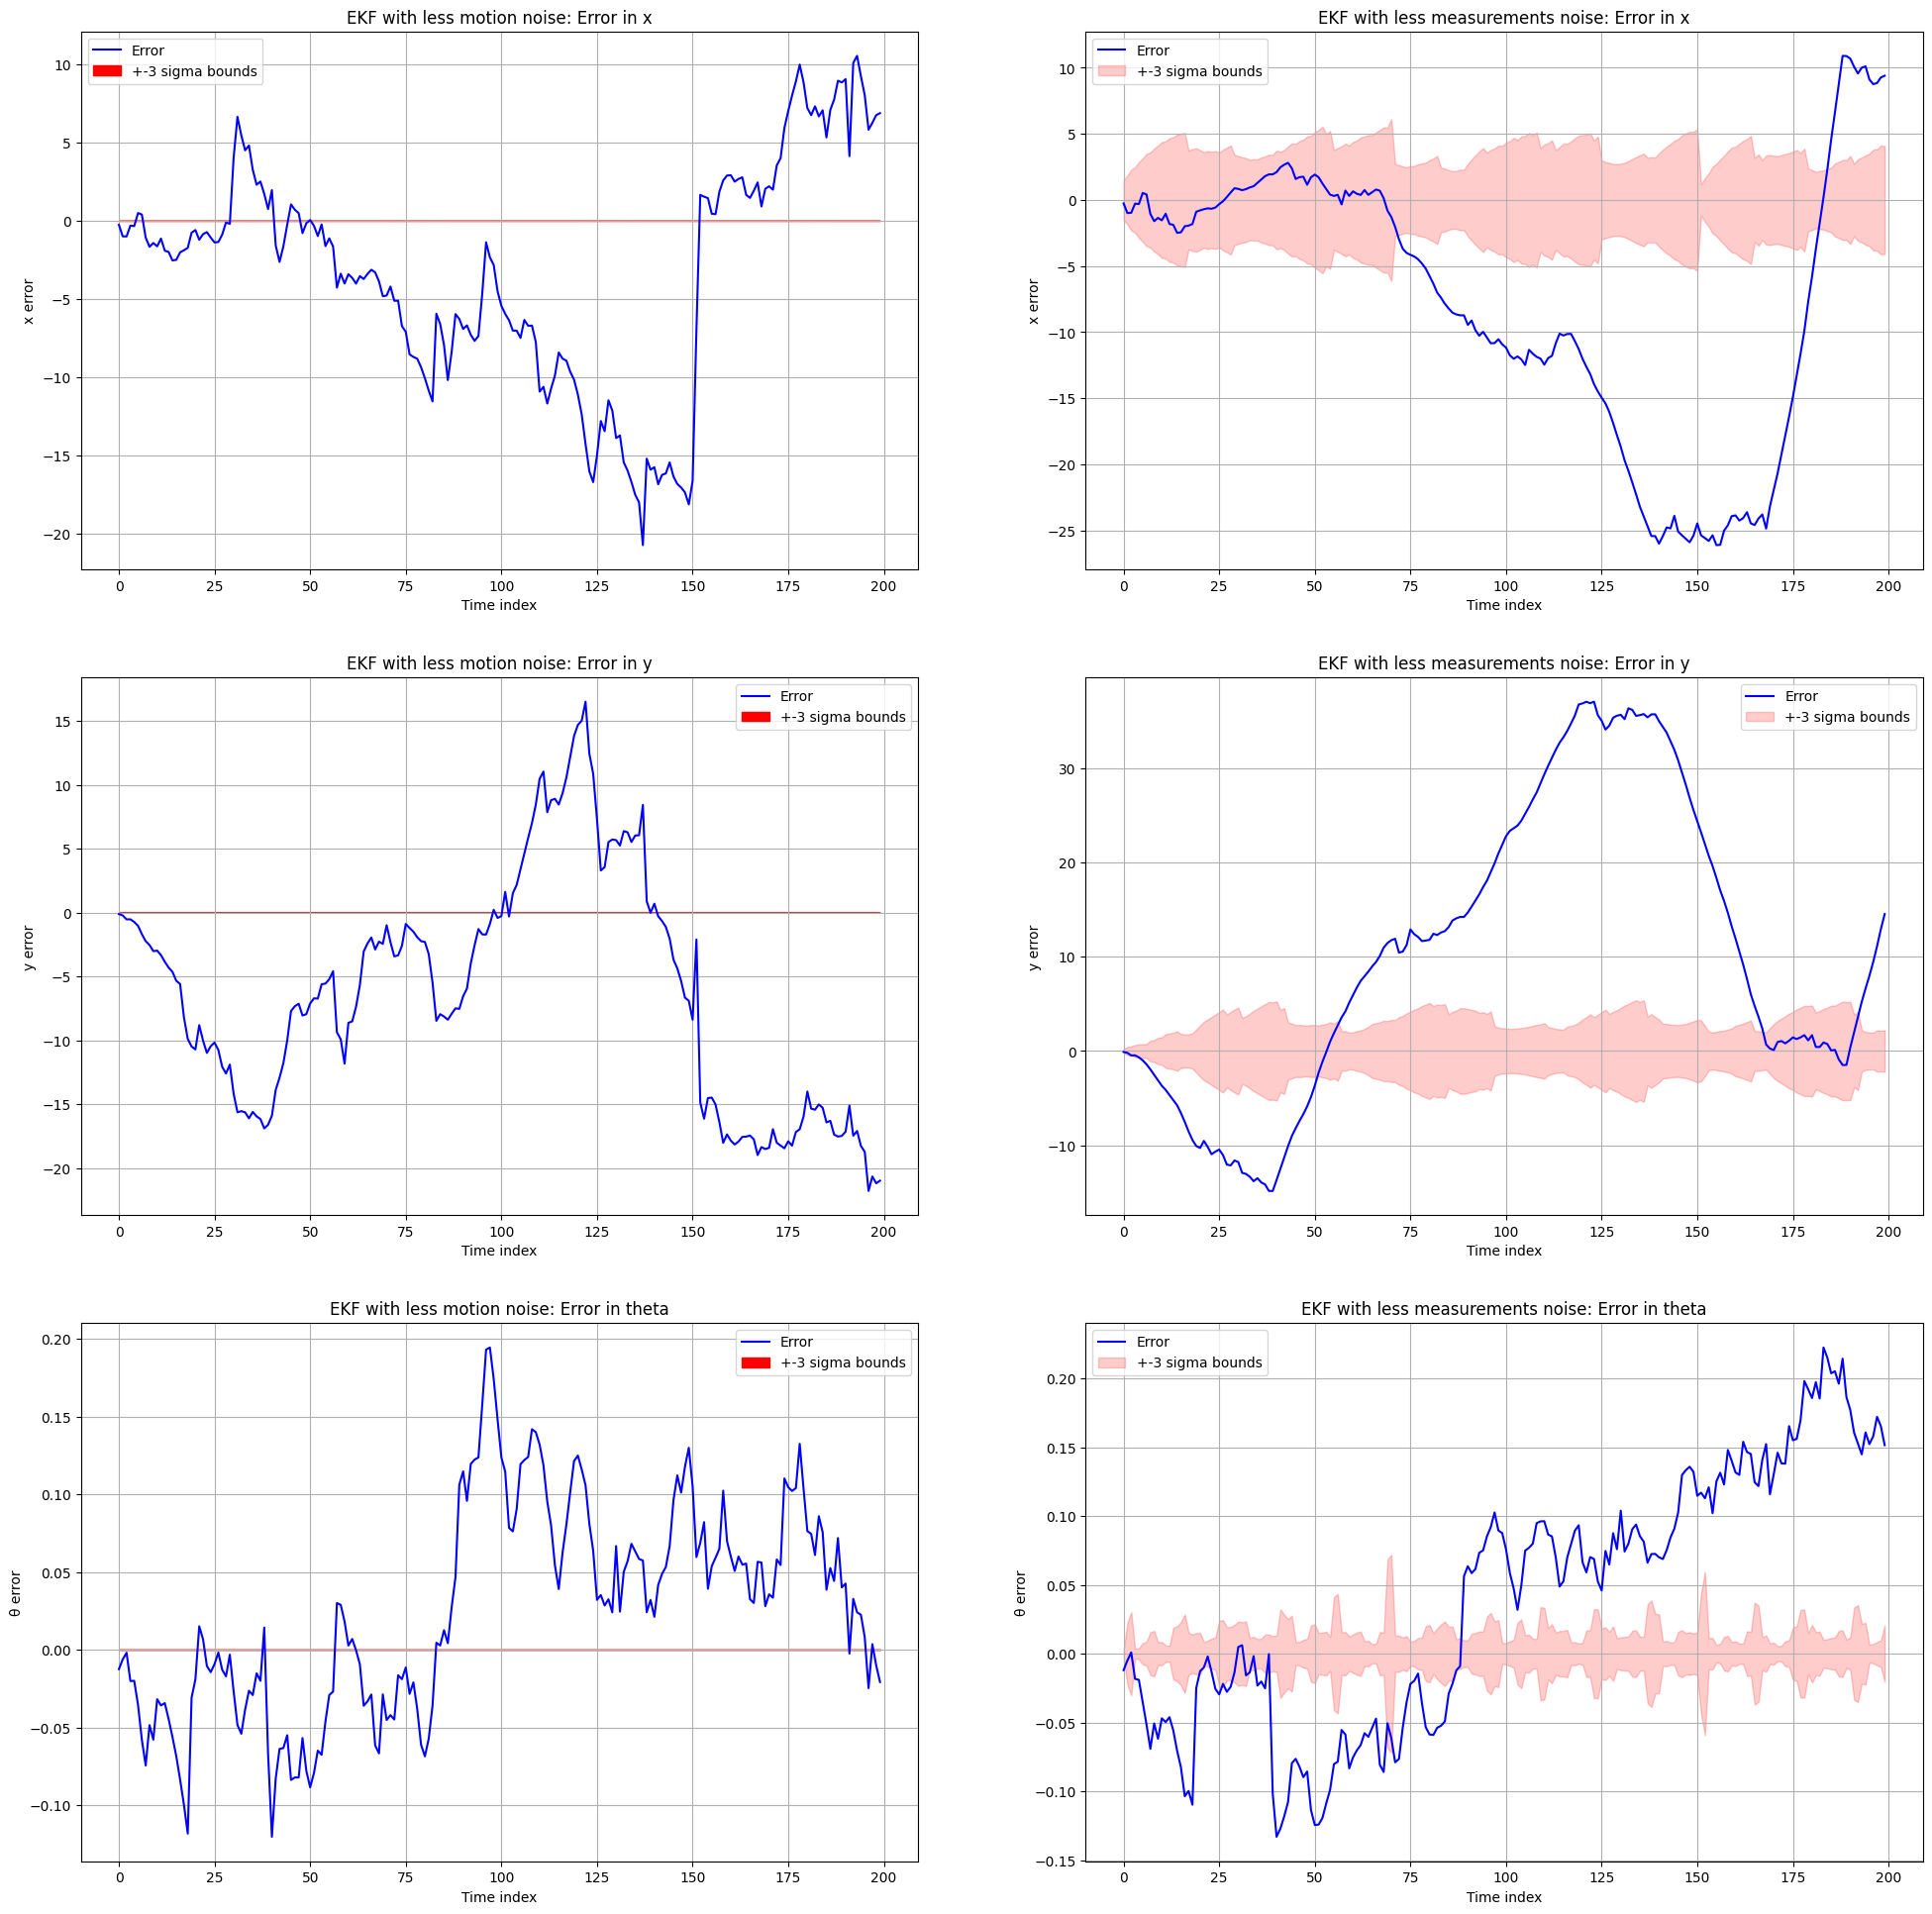

In [6]:
ekf_input = np.load('exp_data/ekf_less_noise_motion_exp/input_data.npy')
ekf_output = np.load('exp_data/ekf_less_noise_motion_exp/output_data.npy')

real_path_ekf = ekf_input['real_robot_path']

mean_path_ekf= ekf_output['mean_trajectory']

cov_path_ekf = ekf_output['covariance_trajectory']

n_ekf_steps = ekf_input['num_steps']



ekf_input = np.load('exp_data/ekf_less_noise_measurements_exp/input_data.npy')
ekf_output = np.load('exp_data/ekf_less_noise_measurements_exp/output_data.npy')

real_path_ekf_less_noise_measurements = ekf_input['real_robot_path']

mean_path_ekf_less_noise_measurements= ekf_output['mean_trajectory']

cov_path_ekf_less_noise_measurements = ekf_output['covariance_trajectory']

n_ekf_steps_less_noise_measurements = ekf_input['num_steps']

error_ekf_less_noise_motion = real_path_ekf - mean_path_ekf

for i in range(len(error_ekf)):
    error_ekf[i, 2] = wrap_angle(error_ekf[i, 2])

for i in range(len(error_ekf_less_noise_motion)):
    error_ekf_less_noise_motion[i, 2] = wrap_angle(error_ekf_less_noise_motion[i, 2])

sigma_ekf = np.sqrt(np.diagonal(cov_path_ekf, axis1=0, axis2=1))

time_ekf = np.arange(n_ekf_steps)

sigma_ekf_less_noise_motion = np.sqrt(np.diagonal(cov_path_ekf_less_noise_measurements, axis1=0, axis2=1))

time_ekf_less_noise_motion = np.arange(n_ekf_steps_less_noise_measurements)



fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF with less motion noise: {titles[i]}')
    axs[i, 0].plot(time_ekf, error_ekf[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_ekf, -3 * sigma_ekf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=1, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'EKF with less measurements noise: {titles[i]}')
    axs[i, 1].plot(time_ekf, error_ekf_less_noise_motion[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_ekf_less_noise_motion, -3 * sigma_ekf_less_noise_motion[:, i], 3 * sigma_ekf_less_noise_motion[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

**Analysis**:

Our experiments with noise reduction in the Extended Kalman Filter reveal interesting patterns in localization accuracy. When we reduce motion noise, the EKF's predictions show some improvement, though x and y position errors remain notable. This persistent error suggests that sensor noise and incomplete motion modeling continue to impact performance even with cleaner motion data.

More promising results emerge when we reduce measurement noise. The filter demonstrates increased confidence in its estimates, evidenced by narrower uncertainty bounds in the visualization. The improvement is particularly striking in angle estimation (theta), where errors become more predictable and consistently fall within the three-sigma bounds. This enhanced performance makes intuitive sense - the EKF relies heavily on measurement updates to correct its predictions, so cleaner measurement data leads to more reliable corrections.

The comparative impact of these noise reductions is enlightening. Measurement noise reduction yields substantially better results than motion noise reduction, highlighting the EKF's strong dependence on reliable sensor data. However, it's important to note that even under optimal noise conditions, some level of error persists. This suggests fundamental limitations in the EKF's ability to perfectly model real-world dynamics, possibly due to inherent non-linearities or unmodeled effects in the system.

These findings have practical implications for implementation - when optimizing an EKF-based localization system, investing in better sensors might be more valuable than trying to perfect the motion model. Nevertheless, the presence of residual errors reminds us that perfect localization remains an idealized goal, and practical applications should account for this inherent uncertainty.

### Subtask 2: Lets make an adjustment of number of particles in Particle Filter and see what happens

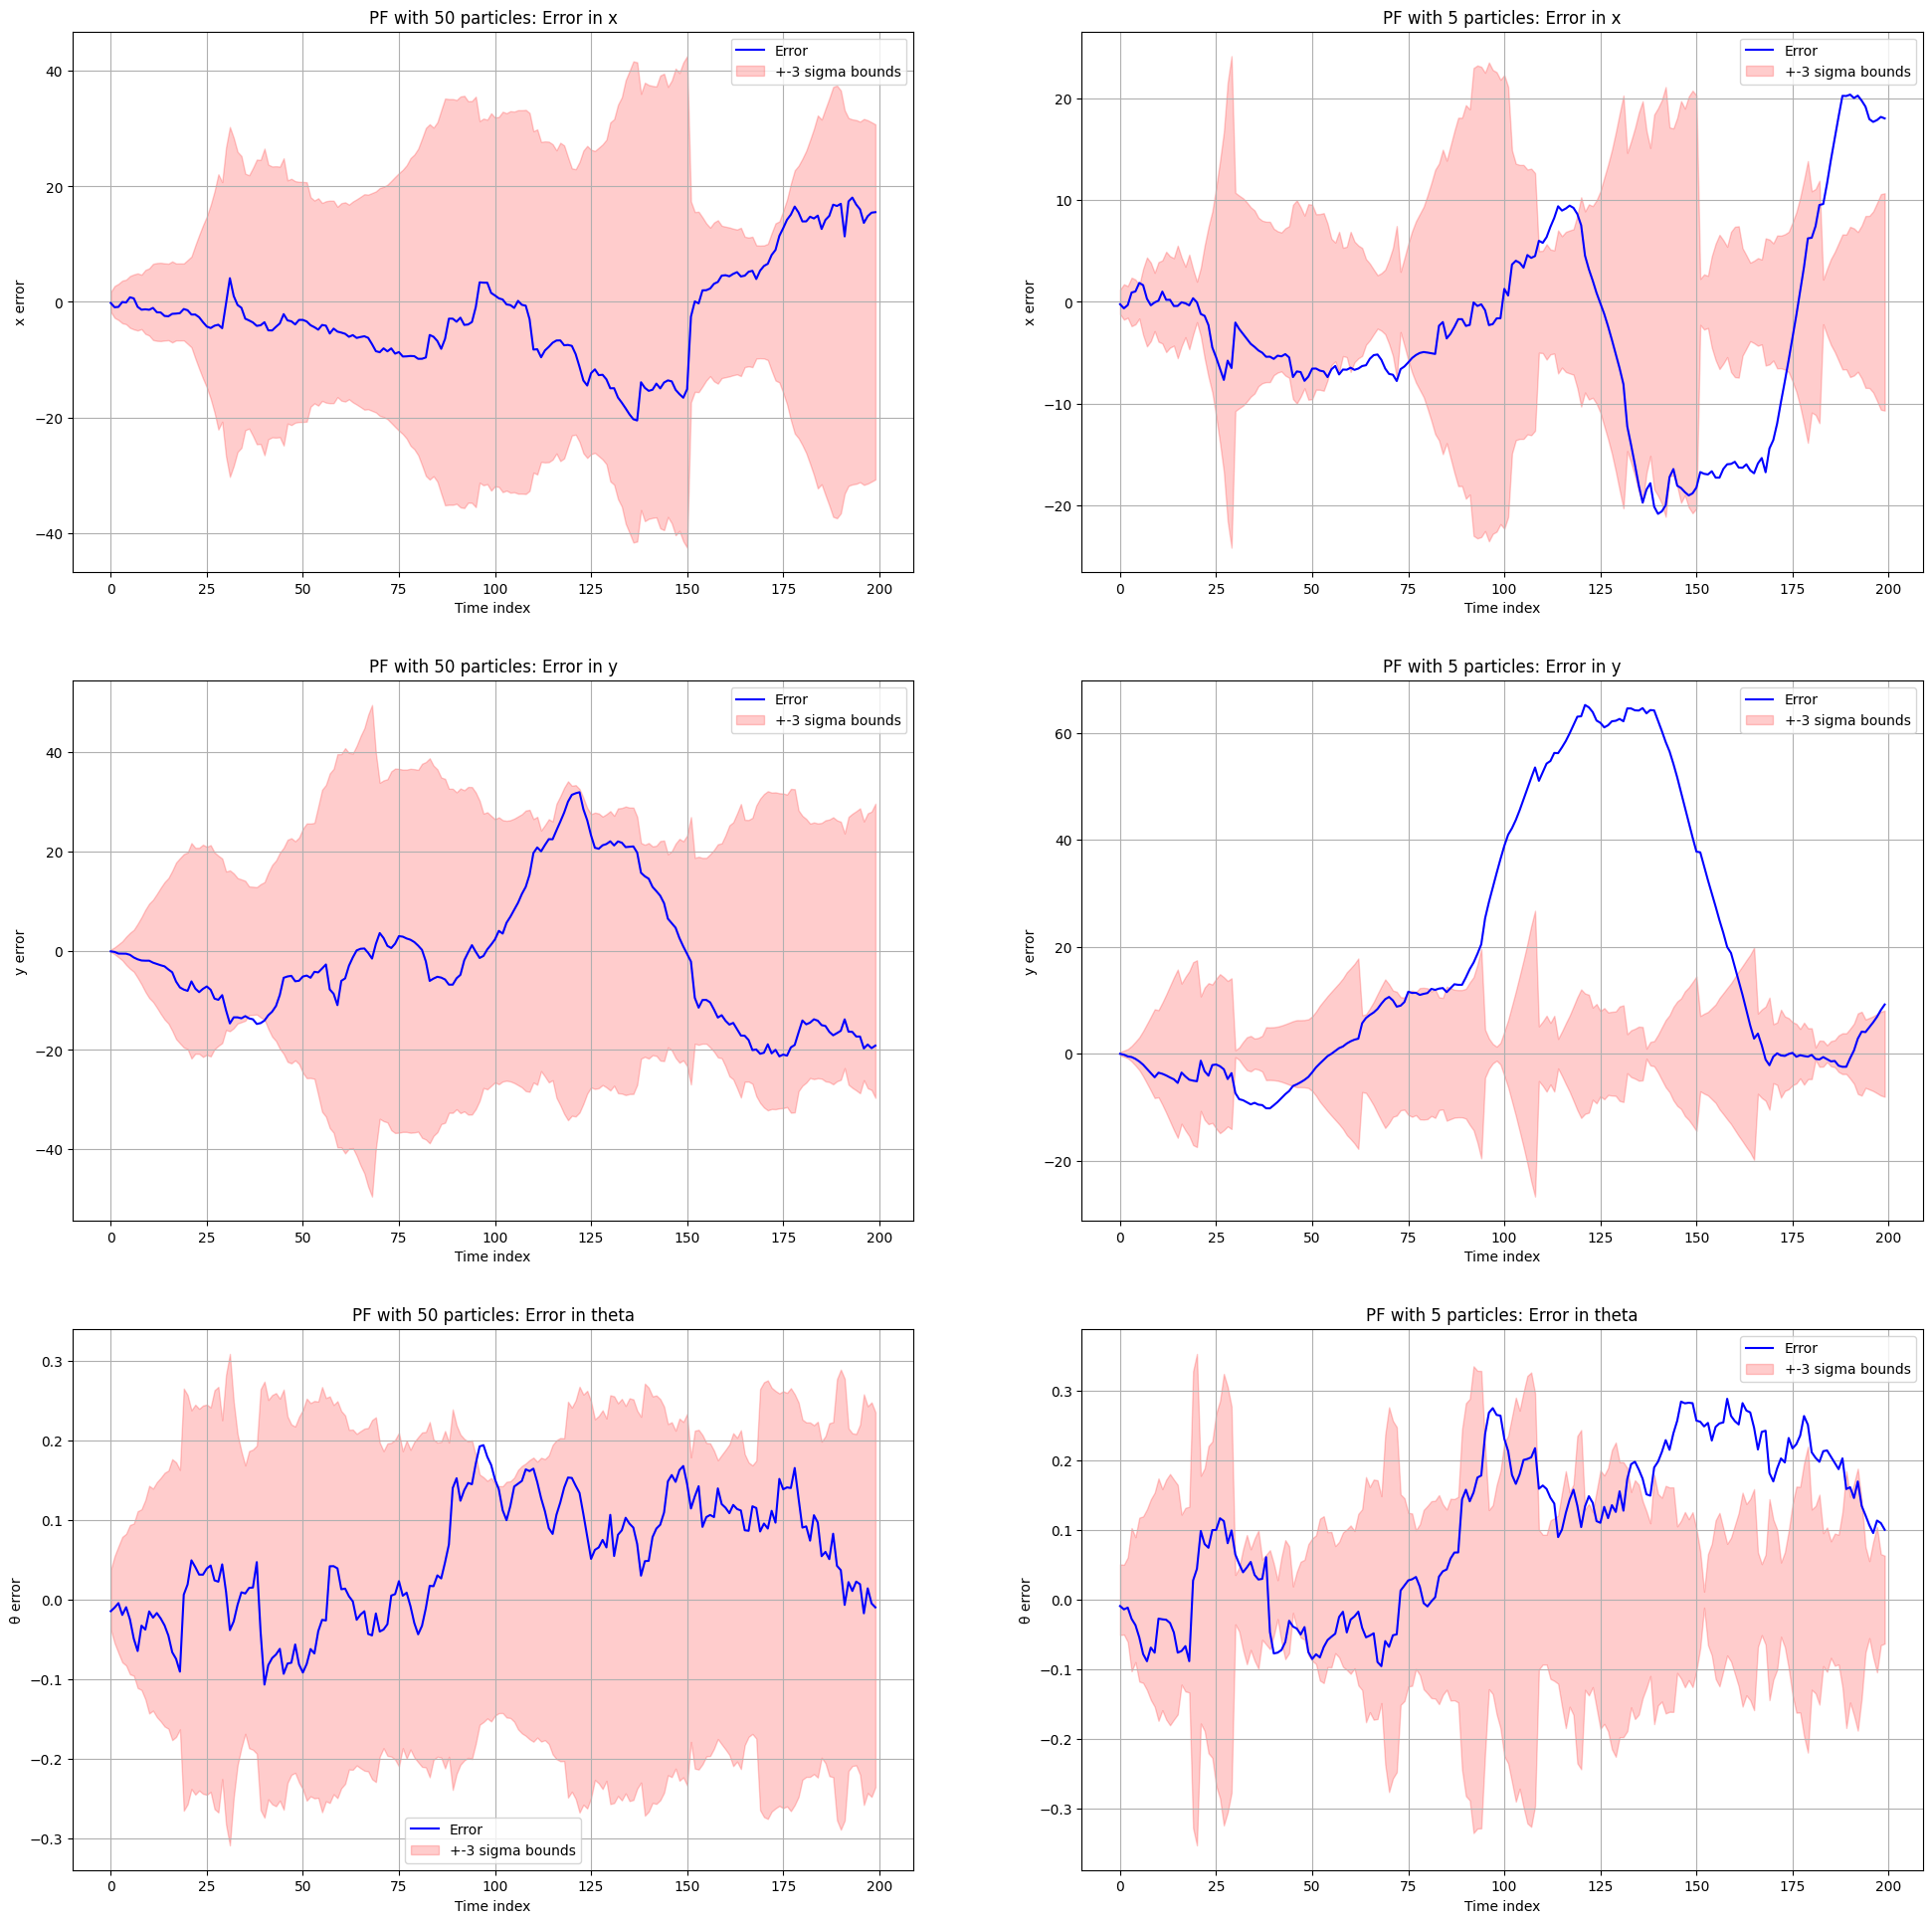

In [7]:
pf_input_50 = np.load('exp_data/pf_50_particles/input_data.npy')
pf_output_50 = np.load('exp_data/pf_50_particles/output_data.npy')

pf_input_5 = np.load('exp_data/pf_5_particles/input_data.npy')
pf_output_5 = np.load('exp_data/pf_5_particles/output_data.npy')


real_path_pf_50 = pf_input_50['real_robot_path']
real_path_pf_5 = pf_input_5['real_robot_path']

mean_path_pf_50 = pf_output_50['mean_trajectory']
mean_path_pf_5 = pf_output_5['mean_trajectory']

cov_path_pf_50 = pf_output_50['covariance_trajectory']
cov_path_pf_5 = pf_output_5['covariance_trajectory']

n_pf_steps_50 = pf_input_50['num_steps']
n_pf_steps_5 = pf_input_5['num_steps']

error_pf_50 = real_path_pf_50 - mean_path_pf_50
error_pf_5 = real_path_pf_5 - mean_path_pf_5

for i in range(len(error_pf_50)):
    error_pf_50[i, 2] = wrap_angle(error_pf_50[i, 2])

for i in range(len(error_pf_5)):
    error_pf_5[i, 2] = wrap_angle(error_pf_5[i, 2])

sigma_pf_50 = np.sqrt(np.diagonal(cov_path_pf_50, axis1=0, axis2=1))
sigma_pf_5 = np.sqrt(np.diagonal(cov_path_pf_5, axis1=0, axis2=1))

time_pf_50 = np.arange(n_pf_steps_50)
time_pf_5 = np.arange(n_pf_steps_5)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'PF with 50 particles: {titles[i]}')
    axs[i, 0].plot(time_pf_50, error_pf_50[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_pf_50, -3 * sigma_pf_50[:, i], 3 * sigma_pf_50[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'PF with 5 particles: {titles[i]}')
    axs[i, 1].plot(time_pf_5, error_pf_5[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf_5, -3 * sigma_pf_5[:, i], 3 * sigma_pf_5[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

**Analysis**:
With 50 particles, the filter demonstrates stable and reliable performance - errors generally stay within bounds
and uncertainty estimates are reasonable, showing good position tracking capability. In contrast, using only 
5 particles leads to unstable behavior with erratic errors and unreliable uncertainty bounds. This degraded
performance occurs because 5 particles cannot adequately approximate the robot's possible state distribution.
The key insight is that particle count must be carefully balanced - enough particles are needed for accurate
state estimation, but too many will unnecessarily increase computational load without proportional benefits.

### Subtask 3: Lets make some modifications in the noise parameters of the motion model and the measurement model and see how it affects the EKF.

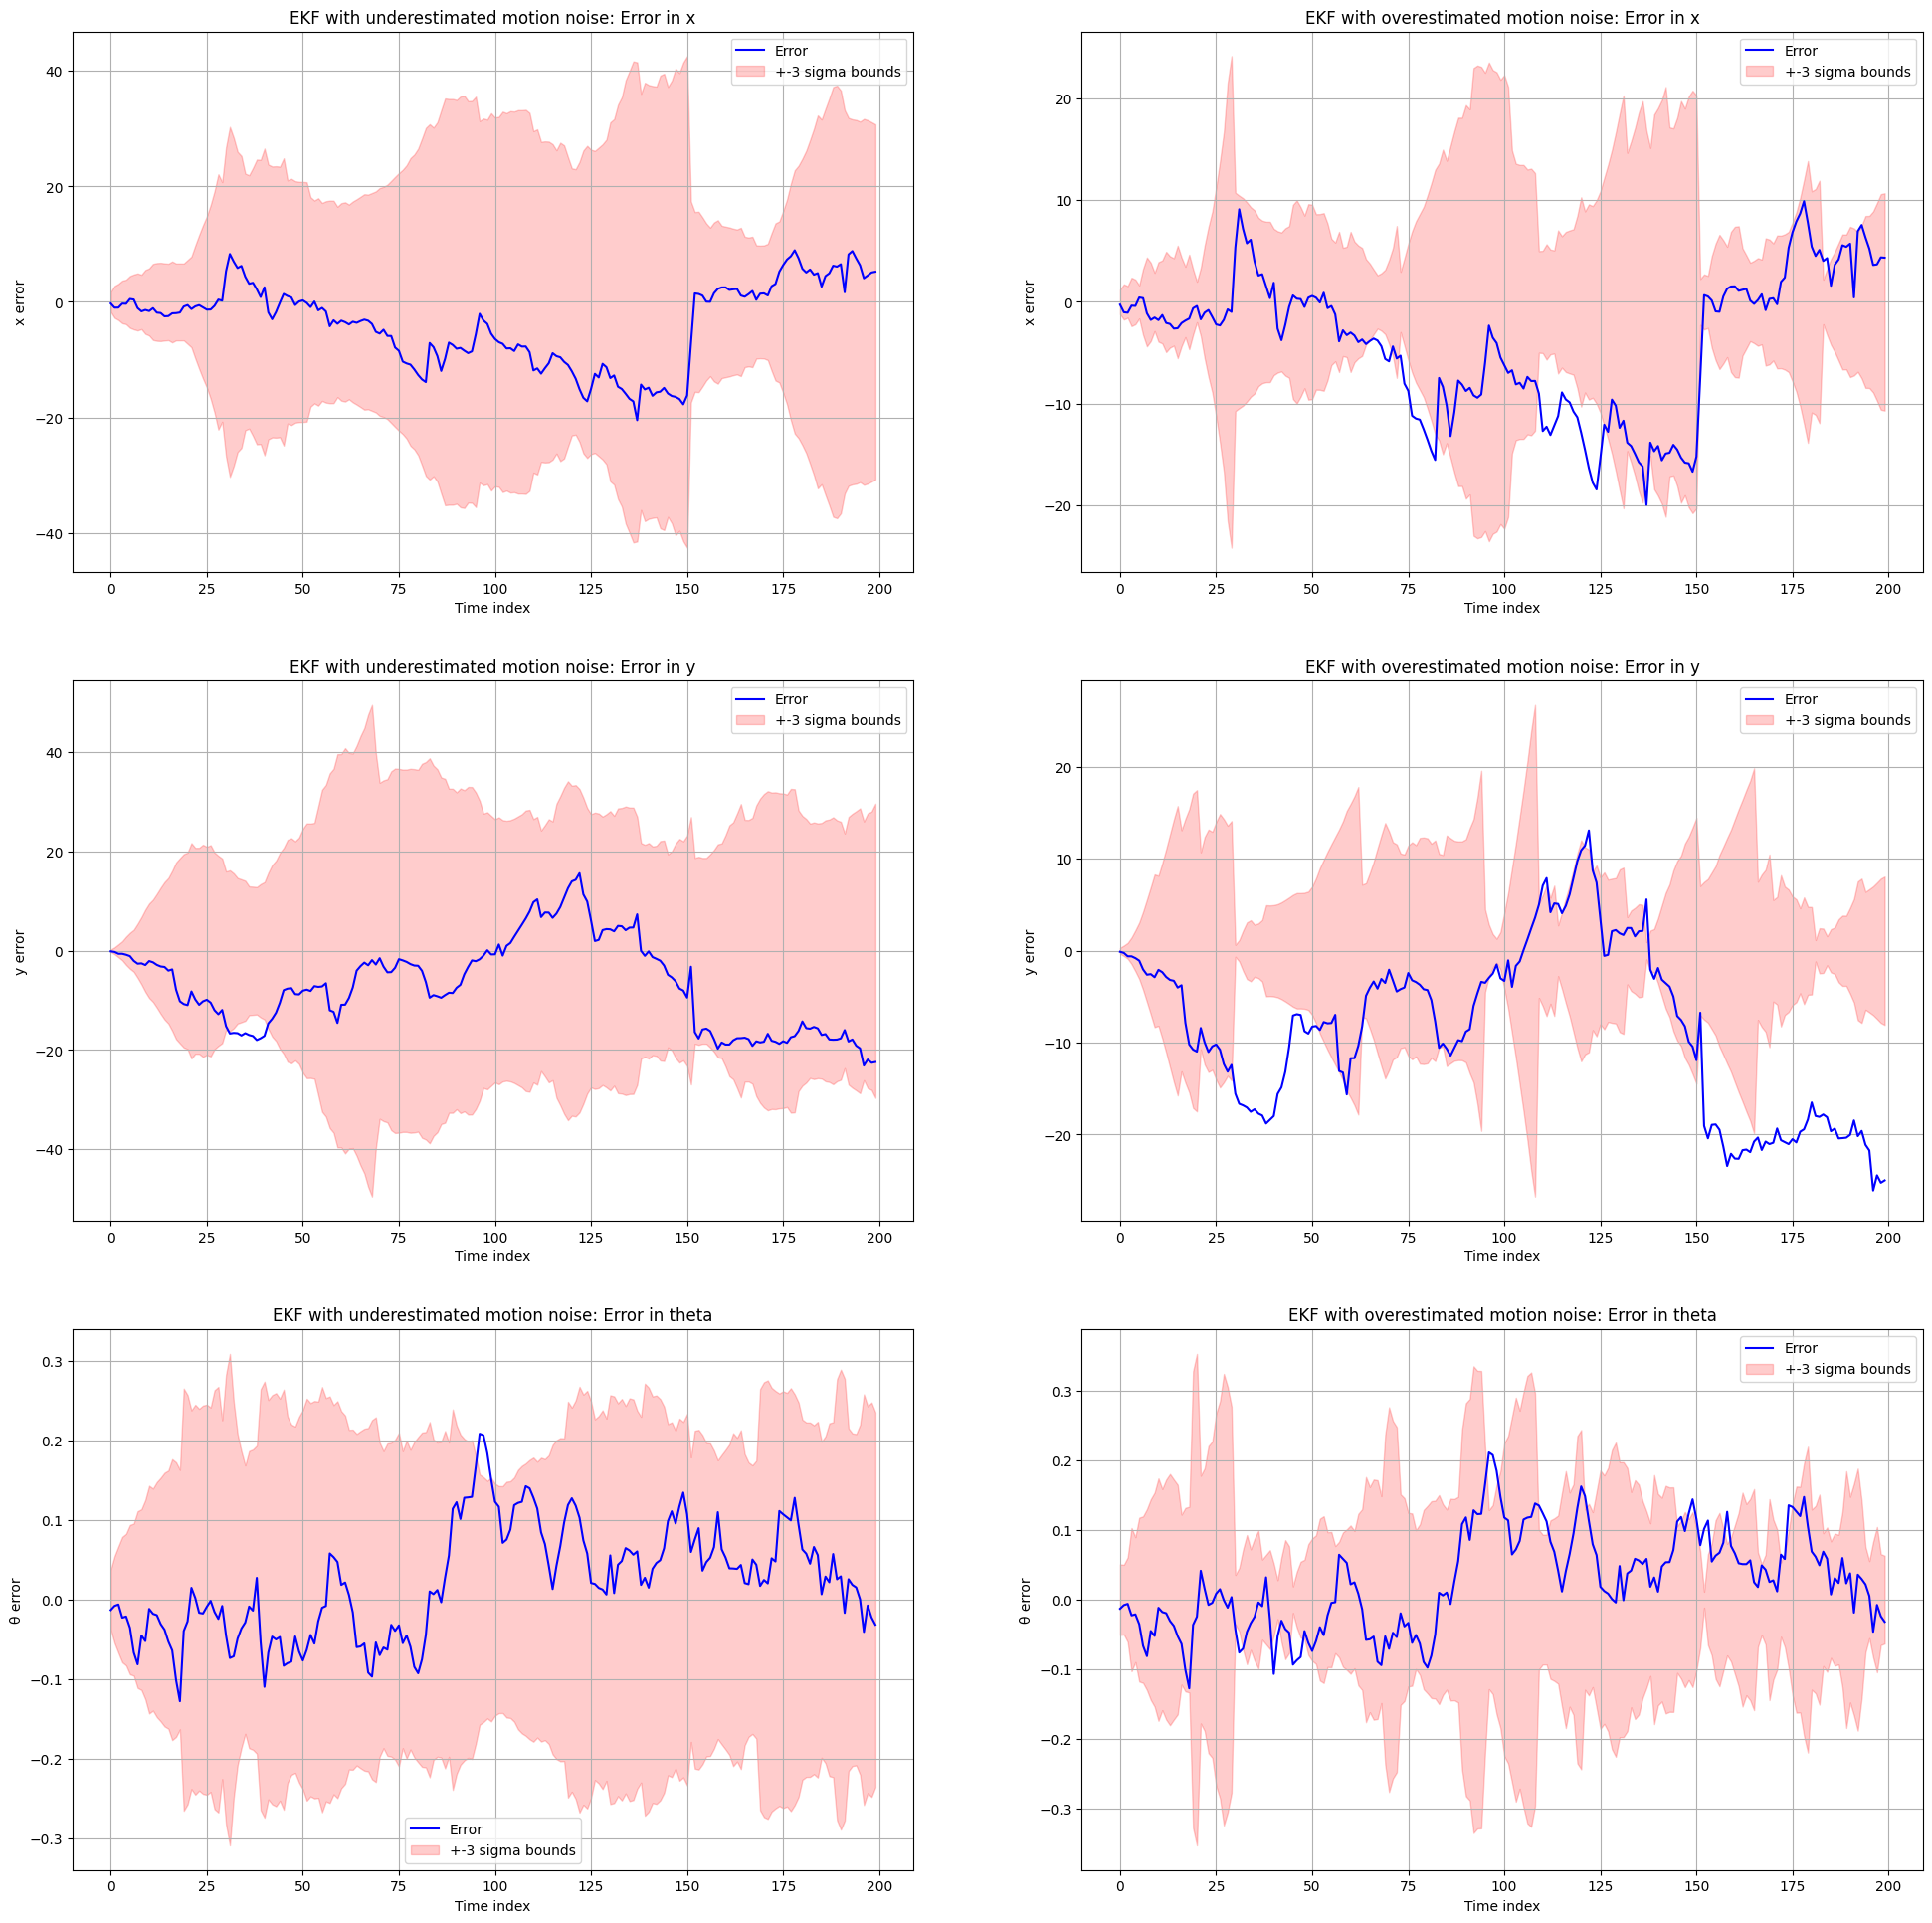

In [9]:
ekf_underestimates_input= np.load('exp_data/ekf_underestimate/input_data.npy')
ekf_underestimates_output = np.load('exp_data/ekf_underestimate/output_data.npy')

ekf_overestimates_input = np.load('exp_data/ekf_overestimate/input_data.npy')
ekf_overestimates_output = np.load('exp_data/ekf_overestimate/output_data.npy')


real_path_ekf_underestimates = ekf_underestimates_input['real_robot_path']
real_path_ekf_overestimates = ekf_overestimates_input['real_robot_path']

mean_path_ekf_underestimates = ekf_underestimates_output['mean_trajectory']
mean_path_ekf_overestimates = ekf_overestimates_output['mean_trajectory']

cov_path_ekf_underestimates = ekf_underestimates_output['covariance_trajectory']
cov_path_ekf_overestimates = ekf_overestimates_output['covariance_trajectory']

n_ekf_steps_underestimates = ekf_underestimates_input['num_steps']
n_ekf_steps_overestimates = ekf_overestimates_input['num_steps']

error_ekf_underestimates = real_path_ekf_underestimates - mean_path_ekf_underestimates
error_ekf_overestimates = real_path_ekf_overestimates - mean_path_ekf_overestimates

for i in range(len(error_ekf_underestimates)):
    error_ekf_underestimates[i, 2] = wrap_angle(error_ekf_underestimates[i, 2])

for i in range(len(error_ekf_overestimates)):
    error_ekf_overestimates[i, 2] = wrap_angle(error_ekf_overestimates[i, 2])

sigma_ekf_underestimates = np.sqrt(np.diagonal(cov_path_ekf_underestimates, axis1=0, axis2=1))
sigma_ekf_overestimates = np.sqrt(np.diagonal(cov_path_ekf_overestimates, axis1=0, axis2=1))

time_ekf_underestimates = np.arange(n_ekf_steps_underestimates)
time_ekf_overestimates = np.arange(n_ekf_steps_overestimates)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF with underestimated motion noise: {titles[i]}')
    axs[i, 0].plot(time_ekf_underestimates, error_ekf_underestimates[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_pf_50, -3 * sigma_pf_50[:, i], 3 * sigma_pf_50[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'EKF with overestimated motion noise: {titles[i]}')
    axs[i, 1].plot(time_ekf_overestimates, error_ekf_overestimates[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf_5, -3 * sigma_pf_5[:, i], 3 * sigma_pf_5[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

**Analysis**: Underestimating noise in the filter leads to overconfidence in its state estimates. This is evident in the left graphs, where the narrow uncertainty bounds (red shaded regions) are frequently exceeded by the actual errors (blue lines). The filter assumes greater precision than it actually has, which can result in inaccurate state estimation and potentially unsafe robot behavior in real-world applications.

Conversely, overestimating noise (shown in right graphs) causes the filter to be overly conservative. While the wider uncertainty bounds generally contain the errors, the filter becomes less responsive and exhibits more variance in its estimates. This excessive caution impairs the filter's ability to track the true trajectory effectively. The key insight is that noise parameter tuning requires careful balance - underestimation creates dangerous overconfidence while overestimation leads to sluggish, suboptimal performance. Optimal filter behavior lies in finding appropriate middle-ground noise parameters that reflect the true uncertainty in the system.

**Note**: In some portions of this document (not exceeding 15% of the entire text) Artificial Intelligence assistant, particularly Generative AI, has been used to rephrase, shorten, or summarize the content. The technologies used include Claude 3.5-Sonnet and Perplexity.